## Load dataset

Dataset yang digunakan dalam praktek kali ini adalah <a href="https://www.kaggle.com/dhs/refugee-report?select=refugee_status.csv">Refugees in the United States, 2006-2015</a> yang mana menampilkan data pengungsi di Amerika Serikat dari berbagai negara dari tahun 2006 sampai 2015.

__Feature Information:__

* __Continent/Country of Nationality__: Benua atau negara asal para pengungsi.
* __2006 - 2015__ : Jumlah pengungsi yang pindah ke Amerika Serikat pada tahun tersebut (2006 - 2015).

<i>import</i> terlebih dahulu <i>library</i> yang dibutuhkan yaitu Pandas dan Matplotlib.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

Setelah itu kita <i>load</i> dataset ke dalam dataframe Pandas dengan <code>read_csv()</code>.

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
%cd /content/gdrive/My Drive/Colab Notebooks/DATASET/datasets_py/

/content/gdrive/My Drive/Colab Notebooks/DATASET/datasets_py


In [4]:
# Load dataset ke dalam dataframe Pandas

df = pd.read_csv("refugee_status.csv")
df.head(10)

,Continent/Country of Nationality,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Africa,"18,129","17,486","8,943","9,678","13,325","7,693","10,629","15,984","17,501","22,492"
1,Asia,"10,086","23,564","44,819","58,309","52,695","44,583","44,416","48,840","47,197","43,115"
2,Europe,"9,615","4,192","2,059","1,693","1,238",996,908,482,818,"2,164"
3,North America,"3,145","2,922","4,177","4,800","4,856","2,930","1,948","4,206","4,066","1,528"
4,Oceania,-,-,-,-,-,-,-,-,-,-
5,South America,119,54,100,57,126,46,130,233,252,522
6,Unknown,-,-,9,65,"1,053",136,148,164,141,99
7,Afghanistan,651,441,576,349,515,428,481,661,753,910
8,Angola,13,4,-,8,-,D,-,6,-,5
9,Armenia,87,29,9,4,D,15,8,3,10,49


Untuk memudahkan pengindeksan dan visualisasi data, atur kolom <code>Continent/Country of Nationality</code> sebagai indeks dengan <code>set_index()</code>.

In [5]:
# Set 'Continent/Country of Nationality' sebagai indeks

df.set_index('Continent/Country of Nationality', inplace=True)

Dalam praktek ini akan menggunakan data pengungsi berdasarkan benua saja. Oleh karena itu, filter dataframe <code>df</code> dengan hanya mengambil 6 data teratas yang merupakan representasi benua dan menyimpannya ke dalam dataframe baru, misalnya <code>df_continent</code>.

In [6]:
# Mengambil 6 baris teratas yang merupakan data benua

df_continent = df.head(6)
df_continent

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Continent/Country of Nationality,,,,,,,,,,
Africa,"18,129","17,486","8,943","9,678","13,325","7,693","10,629","15,984","17,501","22,492"
Asia,"10,086","23,564","44,819","58,309","52,695","44,583","44,416","48,840","47,197","43,115"
Europe,"9,615","4,192","2,059","1,693","1,238",996,908,482,818,"2,164"
North America,"3,145","2,922","4,177","4,800","4,856","2,930","1,948","4,206","4,066","1,528"
Oceania,-,-,-,-,-,-,-,-,-,-
South America,119,54,100,57,126,46,130,233,252,522


__Oceania__ tidak memiliki data apapun, karena itu ada baiknya kita menghapus baris tersebut karena tidak digunakan.

In [7]:
# Menghapus baris 'Oceania'

df_continent = df_continent.drop(['Oceania'], axis=0)
df_continent

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Continent/Country of Nationality,,,,,,,,,,
Africa,"18,129","17,486","8,943","9,678","13,325","7,693","10,629","15,984","17,501","22,492"
Asia,"10,086","23,564","44,819","58,309","52,695","44,583","44,416","48,840","47,197","43,115"
Europe,"9,615","4,192","2,059","1,693","1,238",996,908,482,818,"2,164"
North America,"3,145","2,922","4,177","4,800","4,856","2,930","1,948","4,206","4,066","1,528"
South America,119,54,100,57,126,46,130,233,252,522


cek informasi dataframe dengan <code>info()</code>.

In [8]:
# Cek info dataframe

df_continent.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, Africa to South America
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   2006    5 non-null      object
 1   2007    5 non-null      object
 2   2008    5 non-null      object
 3   2009    5 non-null      object
 4   2010    5 non-null      object
 5   2011    5 non-null      object
 6   2012    5 non-null      object
 7   2013    5 non-null      object
 8   2014    5 non-null      object
 9   2015    5 non-null      object
dtypes: object(10)
memory usage: 440.0+ bytes


Ternyata semua kolom masih bertipe __object__ yang berarti string. Jika tidak diganti dengan tipe numerik, seperti integer atau float, akan menjadi masalah saat kita ingin melakukan operasi numerik. Dapat dilihat pada dataframe bahwa penulisan angkanya dipisahkan oleh koma. Oleh karena itu, sebelum konversi tipe data dengan <code>astype()</code>, harus menghilangkan tanda koma tersebut terlebih dahulu. Perhatikan kode berikut. 

In [9]:
# Mengganti tanda koma dengan blank

for i in df_continent.columns:
    df_continent[i] = df_continent[i].str.split(',').str.join('').astype(int)

Sekarang mari kita cek hasilnya.

In [10]:
# Melihat dataframe df_continent

df_continent

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Continent/Country of Nationality,,,,,,,,,,
Africa,18129,17486,8943,9678,13325,7693,10629,15984,17501,22492
Asia,10086,23564,44819,58309,52695,44583,44416,48840,47197,43115
Europe,9615,4192,2059,1693,1238,996,908,482,818,2164
North America,3145,2922,4177,4800,4856,2930,1948,4206,4066,1528
South America,119,54,100,57,126,46,130,233,252,522


cek lagi tipe datanya dengan <code>dtypes</code>.

In [11]:
# Mengecek tipe data

df_continent.dtypes

2006    int64
2007    int64
2008    int64
2009    int64
2010    int64
2011    int64
2012    int64
2013    int64
2014    int64
2015    int64
dtype: object

Selanjutnya lakukan operasi numerik pada dataframe <code>df_continent</code>. Buat kolom baru, yaitu kolom <code>Total</code> untuk menampung jumlah total pengungsi dari tahun 2006 sampai 2015.

In [12]:
# Membuat kolom 'Total'

df_continent['Total'] = df_continent.sum(axis=1)
df_continent

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,Total
Continent/Country of Nationality,,,,,,,,,,,
Africa,18129,17486,8943,9678,13325,7693,10629,15984,17501,22492,141860
Asia,10086,23564,44819,58309,52695,44583,44416,48840,47197,43115,417624
Europe,9615,4192,2059,1693,1238,996,908,482,818,2164,24165
North America,3145,2922,4177,4800,4856,2930,1948,4206,4066,1528,34578
South America,119,54,100,57,126,46,130,233,252,522,1639


## Visualisasi data dengan Pie Chart

Setelah menyiapkan data yang akan divisualisasi, Visualisasi data dengan <i>pie chart</i> dapat menggunakan <code>plot()</code> serta memberikan parameter <code>kind = 'pie'</code>. Perhatikan kode berikut.

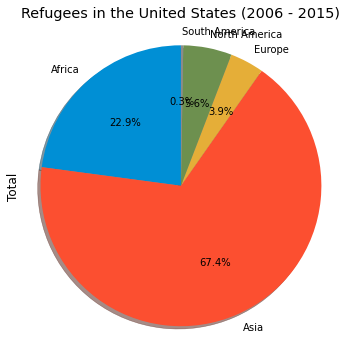

In [13]:
# Membuat pie chart

df_continent['Total'].plot(kind='pie',
                           figsize=(5, 6),
                           autopct='%1.1f%%', # menambahkan persentase
                           startangle=90,     # start angle 90° 
                           shadow=True        # menambahkan shadow      
                           )

plt.title('Refugees in the United States (2006 - 2015)')
plt.axis('equal')     # mengatur rasio axis agar sama antara axis x dan y

plt.show()

Selain parameter <code>kind</code> dan <code>figsize</code> yang sudah sering digunakan pada jenis plot lainnya, ada beberapa parameter lain yang dapat digunakan diantaranya:

* <code>autopct</code> untuk menambahkan angka persentase. 
* <code>startangle</code> untuk mengatur sudut awal chart.
* <code>shadow</code> untuk memberikan kesan bayangan.

### Menghapus label dan menggantinya dengan legend

lihat pada visualisasi sebelumnya, teks label kategorinya (nama benua) ada yang bertumpukan karena memang porsi irisan-irisan yang kecil bersebelahan. Tentunya itu kurang menarik, bukan? 

hapus label tersebut dan menggantinya dengan menggunakan legend. Perhatikan kode berikut.

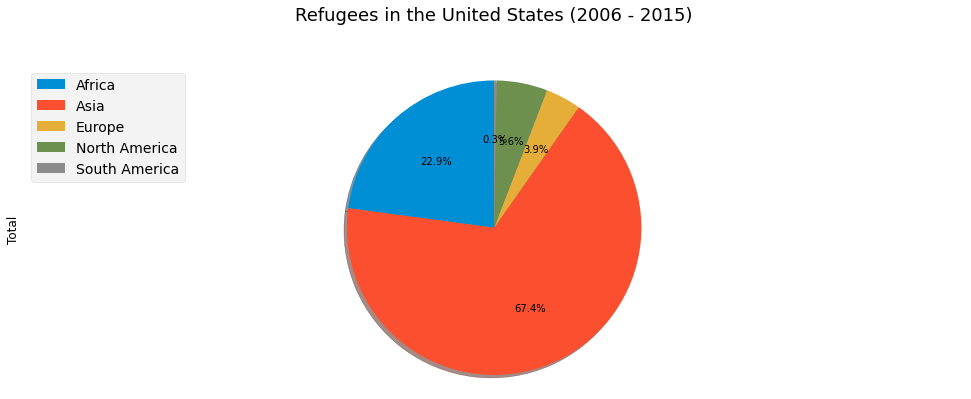

In [14]:
# Membuat pie chart

df_continent['Total'].plot(kind='pie',
                           figsize=(15, 6),
                           autopct='%1.1f%%', # menambahkan persentase
                           startangle=90,     # start angle 90° 
                           shadow=True,       # menambahkan shadow 
                           labels=None        # menghilangkan label pada pie chart
                           )

plt.title('Refugees in the United States (2006 - 2015)', size=18, y=1.12)
plt.axis('equal') # mengatur rasio axis agar sama antara axis x dan y

# add legend
plt.legend(labels=df_continent.index, loc='upper left', fontsize=14) 

plt.show()

Untuk menghapus teks label, beri parameter <code>label = None</code> pada <code>plot()</code> dan juga tambahkan <i>method</i> <code>legend()</code> dari Matplotlib. 

Di dalam <code>legend()</code> tambahkan parameter <code>labels</code> yang diberikan nilai indeks dari <code>df_continent</code> serta atur lokasi penempatan legend dengan parameter <code>loc</code> dan ukuran huruf dengan <code>fontsize</code>.

### Mengatur posisi angka persentase

angka persentase ada yang saling bertumpuk karena diletakkan di dalam <i>pie chart</i>. Untuk merapikannya, buat teks persentase tersebut berada di luar <i>pie chart</i> dengan menambahkan parameter <code>pctdistance</code> yang dapat diberikan nilai numerik berupa bilangan float. Perhatikan kode berikut.

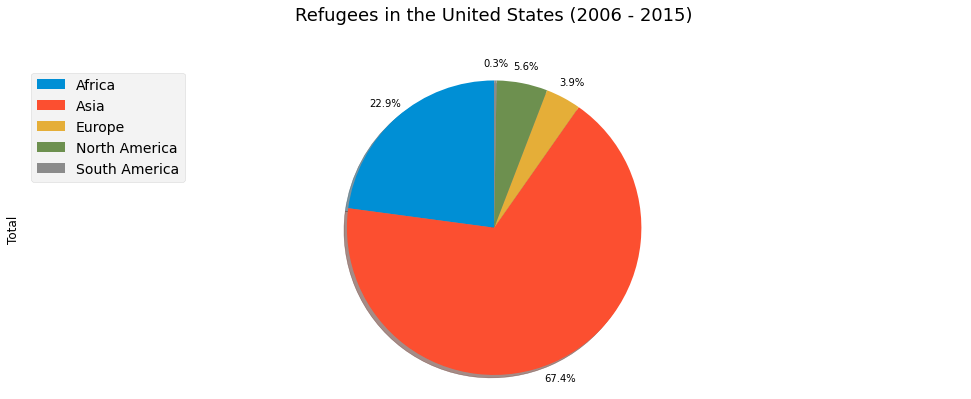

In [15]:
# Membuat pie chart

df_continent['Total'].plot(kind='pie',
                           figsize=(15, 6),
                           autopct='%1.1f%%', # menambahkan persentase
                           startangle=90,     # start angle 90° 
                           shadow=True,       # menambahkan shadow 
                           labels=None,       # menghilangkan label pada pie chart
                           pctdistance=1.12   # rasio antara pusat pie chart posisi awal teks yang dihasilkan oleh autopct 
                           )

plt.title('Refugees in the United States (2006 - 2015)', size=18, y=1.12)
plt.axis('equal') # mengatur rasio axis agar sama antara axis x dan y

# add legend
plt.legend(labels=df_continent.index, loc='upper left', fontsize=14) 

plt.show()

Sekarang sudah terlihat lebih rapi, bukan?

### Mengatur warna

Tidak berbeda dengan pengaturan warna pada jenis plot lainnya, untuk mengatur warna pada <i>pie chart</i> dapat menggunakan parameter <code>colors</code> yang diberikan nilai berupa list nama atau kode warna.

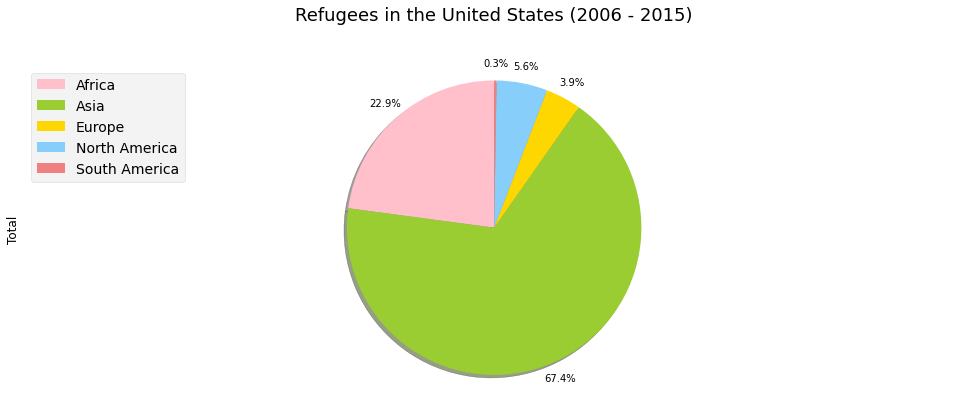

In [16]:
# Membuat pie chart

colors_list = ['pink', 'yellowgreen', 'gold', 'lightskyblue', 'lightcoral']

df_continent['Total'].plot(kind='pie',
                           figsize=(15, 6),
                           autopct='%1.1f%%',    # menambahkan persentase
                           startangle=90,        # start angle 90° 
                           shadow=True,          # menambahkan shadow 
                           labels=None,          # menghilangkan label pada pie chart
                           pctdistance=1.12,     # rasio antara pusat pie chart posisi awal teks yang dihasilkan oleh autopct 
                           colors=colors_list    # mengatur warna
                           )

plt.title('Refugees in the United States (2006 - 2015)', size=18, y=1.12)
plt.axis('equal') # mengatur rasio axis agar sama antara axis x dan y

# add legend
plt.legend(labels=df_continent.index, loc='upper left', fontsize=14) 

plt.show()

Selain dengan menentukan sendiri warnanya, juga dapat menggunakan <i>colormap</i> dengan memberikan parameter <code>cmap</code> yang diberi nilai jenis <i>colormap</i>-nya. Misal beri parameter <code>cmap = 'coolwarm'</code>.

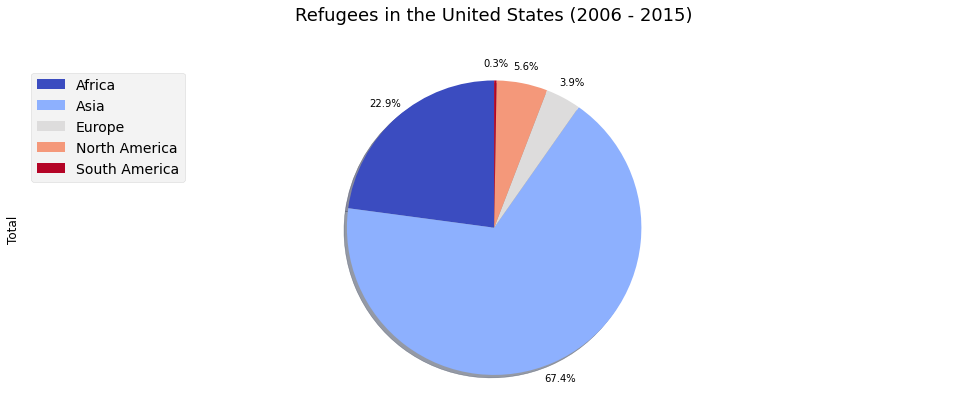

In [17]:
# Membuat pie chart

df_continent['Total'].plot(kind='pie',
                           figsize=(15, 6),
                           autopct='%1.1f%%',    # menambahkan persentase
                           startangle=90,        # start angle 90° 
                           shadow=True,          # menambahkan shadow 
                           labels=None,          # menghilangkan label pada pie chart
                           pctdistance=1.12,     # rasio antara pusat pie chart posisi awal teks yang dihasilkan oleh autopct 
                           cmap='coolwarm'       # mengatur warna dengan colormap
                           )

plt.title('Refugees in the United States (2006 - 2015)', size=18, y=1.12)
plt.axis('equal') # mengatur rasio axis agar sama antara axis x dan y

# add legend
plt.legend(labels=df_continent.index, loc='upper left', fontsize=14) 

plt.show()

### Menekankan irisan chart

Jika ingin menekankan atau menonjolkan irisan tertentu gunakan parameter <code>explode</code> yang diberikan nilai berupa list rasionya dalam bentuk bilangan float. 

Misal ingin menekankan 3 benua dengan angka persentase terkecil. Buat list yang terdiri dari 5 bilangan float. Jika memberikan angka <b>0</b> berarti kita ingin menggesernya atau menonjolkannya, sedangkan jika memberikan nilai __0.1__ dan seterusnya berarti irisan akan bergeser ke luar sesuai nilai rasio tersebut. Perhatikan kode berikut.

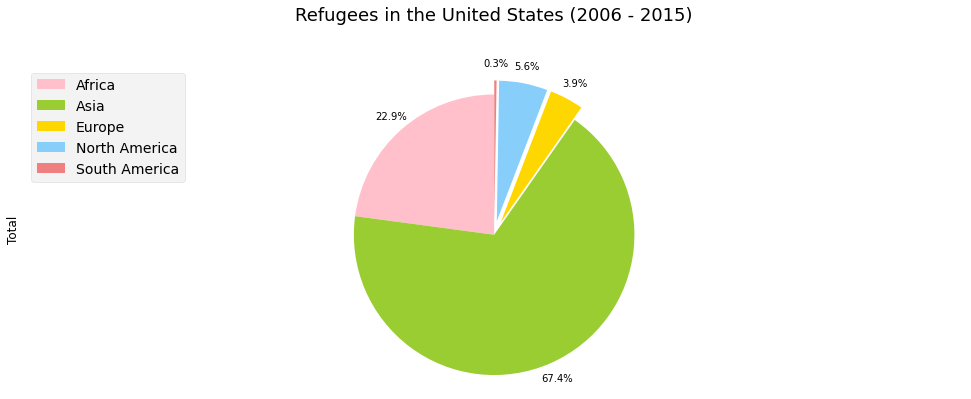

In [18]:
# Membuat pie chart

colors_list = ['pink', 'yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
explode_list = [0, 0, 0.1, 0.1, 0.1] # rasio untuk tiap benua untuk mengimbangi tiap irisan.

df_continent['Total'].plot(kind='pie',
                           figsize=(15, 6),
                           autopct='%1.1f%%',    # menambahkan persentase
                           startangle=90,        # start angle 90° 
                           shadow=False,         # menambahkan shadow 
                           labels=None,          # menghilangkan label pada pie chart
                           pctdistance=1.12,     # rasio antara pusat pie chart posisi awal teks yang dihasilkan oleh autopct 
                           colors=colors_list,   # mengatur warna
                           explode=explode_list  # menekankan 3 benua dengan persentase terkecil
                           )

plt.title('Refugees in the United States (2006 - 2015)', size=18, y=1.12)
plt.axis('equal') # mengatur rasio axis agar sama antara axis x dan y

# add legend
plt.legend(labels=df_continent.index, loc='upper left', fontsize=14) 

plt.show()

Terlihat bukan perbedannya?! Untuk irisan dengan warna __gold__, __lightskyblue__, dan __lightcoral__ yang merupakan 3 benua dengan persentase terkecil terlihat lebih menonjol ke luar lingkaran.

Dan dapat juga memisah-misahkannya jika seluruh bagian irisan pada variabel <code>explode_list</code> diberikan nilai selain 0 seperti di bawah ini.

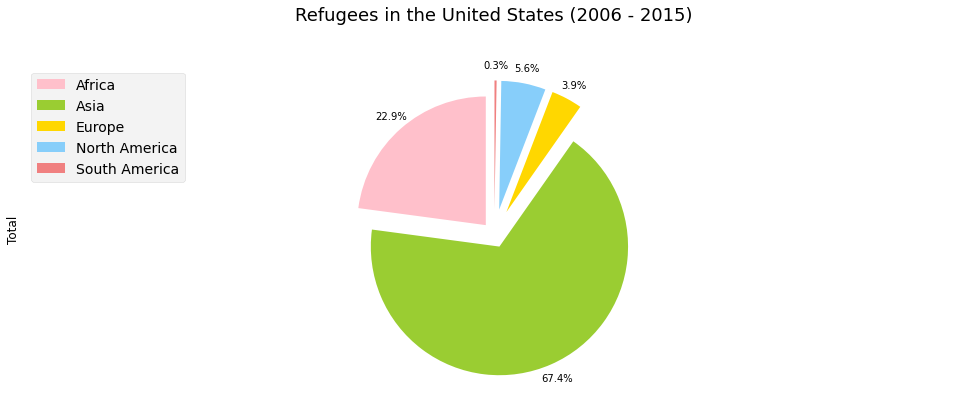

In [19]:
# Membuat pie chart

colors_list = ['pink', 'yellowgreen', 'gold', 'lightskyblue', 'lightcoral']
explode_list = [0.1, 0.1, 0.2, 0.2, 0.2] # rasio untuk tiap benua untuk mengimbangi tiap irisan.

df_continent['Total'].plot(kind='pie',
                           figsize=(15, 6),
                           autopct='%1.1f%%',    # menambahkan persentase
                           startangle=90,        # start angle 90° 
                           shadow=False,         # menambahkan shadow 
                           labels=None,          # menghilangkan label pada pie chart
                           pctdistance=1.12,     # rasio antara pusat pie chart posisi awal teks yang dihasilkan oleh autopct 
                           colors=colors_list,   # mengatur warna
                           explode=explode_list  # menekankan 3 benua dengan persentase terkecil
                           )

plt.title('Refugees in the United States (2006 - 2015)', size=18, y=1.12)
plt.axis('equal') # mengatur rasio axis agar sama antara axis x dan y

# add legend
plt.legend(labels=df_continent.index, loc='upper left', fontsize=14) 

plt.show()

## Donut Chart

Jika sebelumnya membuat <i>pie chart</i> dengan lingkaran penuh, sekarang membuat <i>donut chart</i>. Bentuk <i>chart</i>-nya nanti akan terlihat seperti donut yang memiliki lubang di tengah.

Sebenarnya untuk membuat <i>donut chart</i> tidak berbeda jauh dari <i>pie chart</i>. karena masih menggunakan parameter <code>kind = 'pie'</code> untuk membuatnya. Namun, yang membedakan adalah harus membuat lubang di tengah <i>pie</i> tersebut. Perhatikan kode berikut.

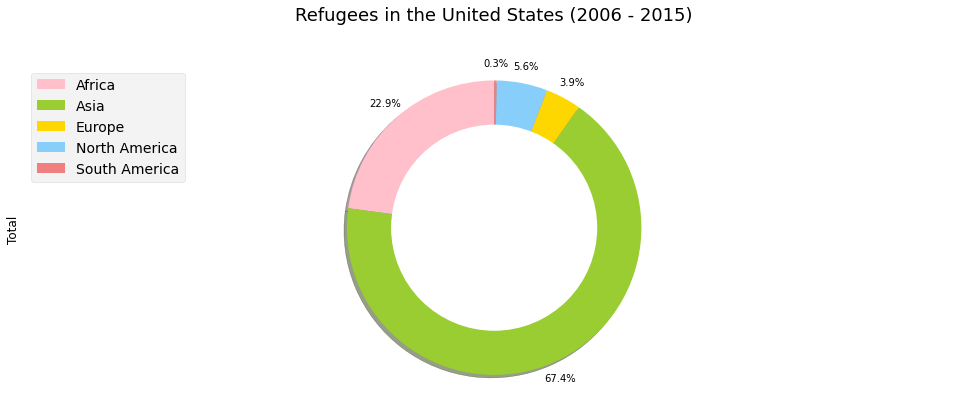

In [20]:
# Membuat donut chart

colors_list = ['pink', 'yellowgreen', 'gold', 'lightskyblue', 'lightcoral']

df_continent['Total'].plot(kind='pie',
                           figsize=(15, 6),
                           autopct='%1.1f%%',    # menambahkan persentase
                           startangle=90,        # start angle 90° 
                           shadow=True,          # menambahkan shadow 
                           labels=None,          # menghilangkan label pada pie chart
                           pctdistance=1.12,     # rasio antara pusat pie chart posisi awal teks yang dihasilkan oleh autopct 
                           colors=colors_list,   # mengatur warna
                           )

#draw circle
centre_circle = plt.Circle((0,0), 0.7, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Refugees in the United States (2006 - 2015)', size=18, y=1.12)
plt.axis('equal') # mengatur rasio axis agar sama antara axis x dan y

# add legend
plt.legend(labels=df_continent.index, loc='upper left', fontsize=14) 

plt.show()

Untuk membuat lubang atau lingkaran pada <i>pie chart</i>, gunakan <i>method</i> <code>Cirlce()</code> dan menyimpannya dalam variabel, misalnya <code>centre_circle</code> seperti pada contoh ini. 

Selanjutnya, <i>figure</i> yang sedang aktif dengan <i>method</i> <code>gcf()</code> serta <i>axes</i> yang sedang aktif dengan <code>gca()</code> dan kemudian menambahkan variabel <code>centre_cirlce</code> tadi ke dalam <i>axes</i> tersebut dengan <i>method</i> <code>add_artist()</code>.

atur <i>radius</i> lingkarannya. Misal ganti <i>radius</i>-nya menjadi __0.5__.

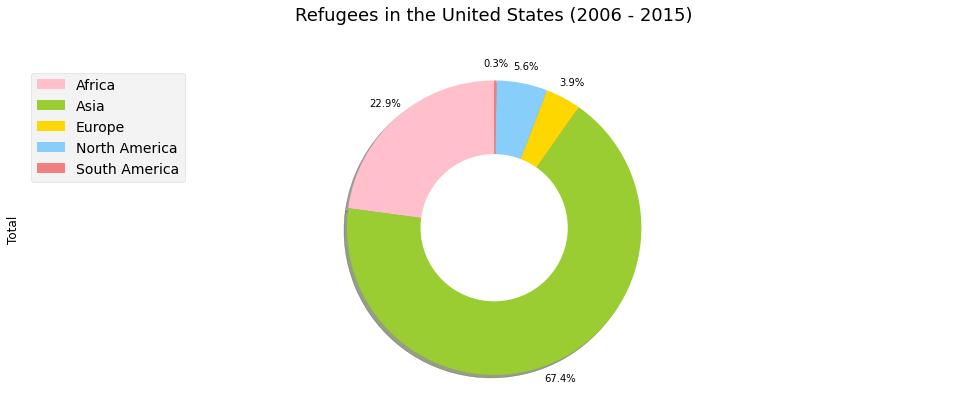

In [21]:
# Membuat donut chart

colors_list = ['pink', 'yellowgreen', 'gold', 'lightskyblue', 'lightcoral']

df_continent['Total'].plot(kind='pie',
                           figsize=(15, 6),
                           autopct='%1.1f%%',    # menambahkan persentase
                           startangle=90,        # start angle 90° 
                           shadow=True,          # menambahkan shadow 
                           labels=None,          # menghilangkan label pada pie chart
                           pctdistance=1.12,     # rasio antara pusat pie chart posisi awal teks yang dihasilkan oleh autopct 
                           colors=colors_list,   # mengatur warna
                           )

#draw circle
centre_circle = plt.Circle((0,0), 0.5, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Refugees in the United States (2006 - 2015)', size=18, y=1.12)
plt.axis('equal') # mengatur rasio axis agar sama antara axis x dan y

# add legend
plt.legend(labels=df_continent.index, loc='upper left', fontsize=14) 

plt.show()



---


Semoga Bermanfaat dan jangan lupa main-main kesini: <a href="https://nurpurwanto.github.io/">**nurpurwanto**</a> Terimakasih.

---


